<a href="https://colab.research.google.com/github/yassine-mathlouthi/job-classification-model/blob/main/resume_classification_using_bert-part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the necessary libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=0d4ce6427bd4b960de43b2d8205efa771d4ec9d817462472769b1dd2be1758ce
  Stored in directory: c:\users\yassi\appdata\local\pip\cache\wheels\40\b3\0f\a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
!pip install tensorflow==2.12.0


   ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/272.9 MB 1.3 MB/s eta 0:03:34
   ---------------------------------------- 0.0/272.9 MB 1.3 MB/s eta 0:03:34
   ---------------------------------------- 0.0/272.9 MB 1.3 MB/s eta 0:03:34
   ---------------------------------------- 0.1/272.9 MB 357.2 kB/s eta 0:12:44
   ---------------------------------------- 0.1/272.9 MB 467.6 kB/s eta 0:09:44
   ---------------------------------------- 0.1/272.9 MB 473.7 kB/s eta 0:09:36
   ---------------------------------------- 0.2/272.9 MB 499.5 kB/s eta 0:09:06
   ---------------------------------------- 0.2/272.9 MB 535.8 kB/s eta 0:08:29
   ---------------------------------------- 0.2/272.9 MB 479.2 kB/s eta 0:09:30
   ---------------------------------------- 0.2/272.9 MB 480.3 kB/s eta 0:09:28
   ---------------------------------------- 0.2/272.9 MB 480.3 kB/s eta 0:09:28
   ---------------------------------------- 0.3/272.9 M

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 2.2.2 requires torch>=1.6.0, which is not installed.
torchvision 0.16.1 requires torch==2.1.1, which is not installed.
ultralytics 8.0.218 requires torch>=1.8.0, which is not installed.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.



   -------------------- ----------------- 146.1/272.9 MB 450.0 kB/s eta 0:04:42
   -------------------- ----------------- 146.1/272.9 MB 450.0 kB/s eta 0:04:42
   -------------------- ----------------- 146.1/272.9 MB 450.0 kB/s eta 0:04:42
   -------------------- ----------------- 146.1/272.9 MB 450.0 kB/s eta 0:04:42
   -------------------- ----------------- 146.1/272.9 MB 450.0 kB/s eta 0:04:42
   -------------------- ----------------- 146.1/272.9 MB 446.9 kB/s eta 0:04:44
   -------------------- ----------------- 146.1/272.9 MB 446.3 kB/s eta 0:04:45
   -------------------- ----------------- 146.2/272.9 MB 447.5 kB/s eta 0:04:44
   -------------------- ----------------- 146.2/272.9 MB 447.5 kB/s eta 0:04:44
   -------------------- ----------------- 146.2/272.9 MB 447.5 kB/s eta 0:04:44
   -------------------- ----------------- 146.2/272.9 MB 447.5 kB/s eta 0:04:44
   -------------------- ----------------- 146.2/272.9 MB 447.5 kB/s eta 0:04:44
   -------------------- ---------------

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, wget
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, TFDistilBertForSequenceClassification
from tensorflow.keras.utils import plot_model
from wordcloud import WordCloud
wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py",out="helper_prabowo_ml.py")
from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords, remove_, remove_digits, lower, email_address, non_ascii, punct

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yassi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
plt.rcParams['figure.figsize'] = (12,8)

## Loading the dataset

In [ ]:
df = pd.read_csv("./UpdatedResumeDataSet.csv")
df


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


## Exploratory Data Analysis (EDA)

In [ ]:
df.shape

(962, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
df.isna().sum()

Category    0
Resume      0
dtype: int64

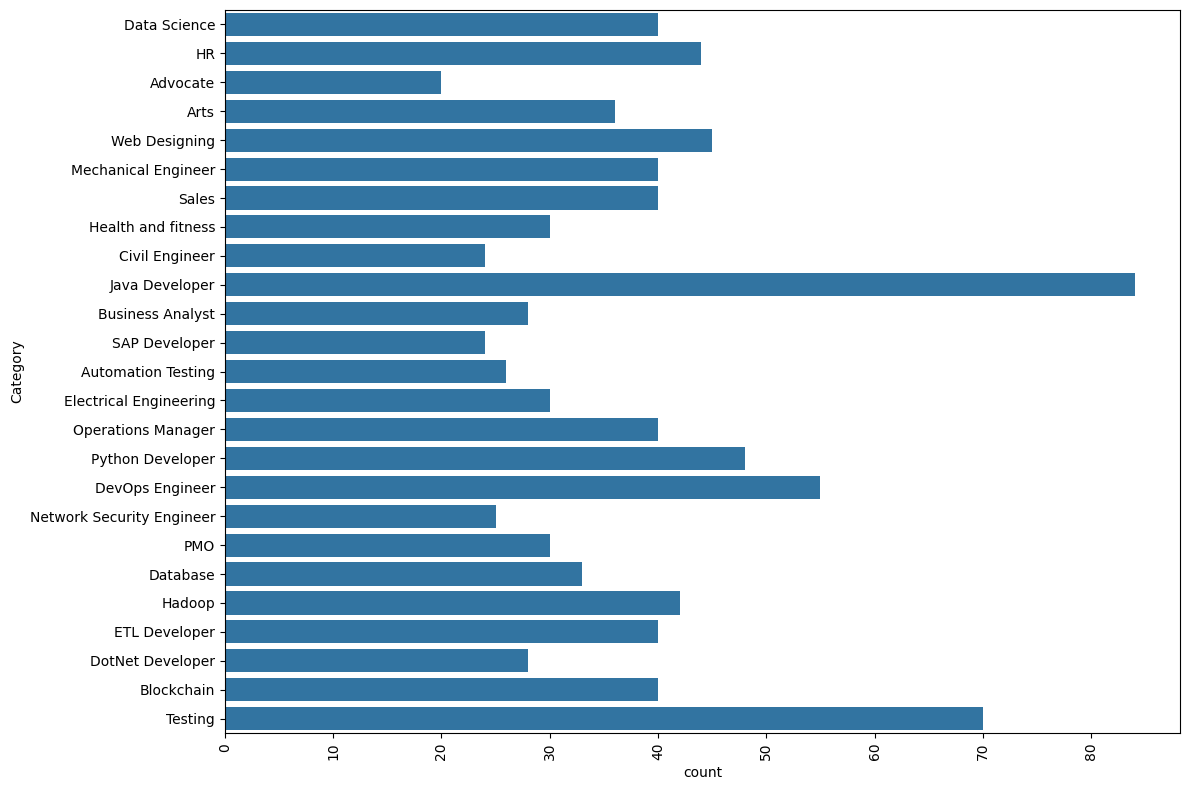

In [ ]:
sns.countplot(df.Category)
plt.xticks(rotation=90)
plt.tight_layout();

In [ ]:
print("Total number of available jobs:", df.Category.nunique())

Total number of available jobs: 25


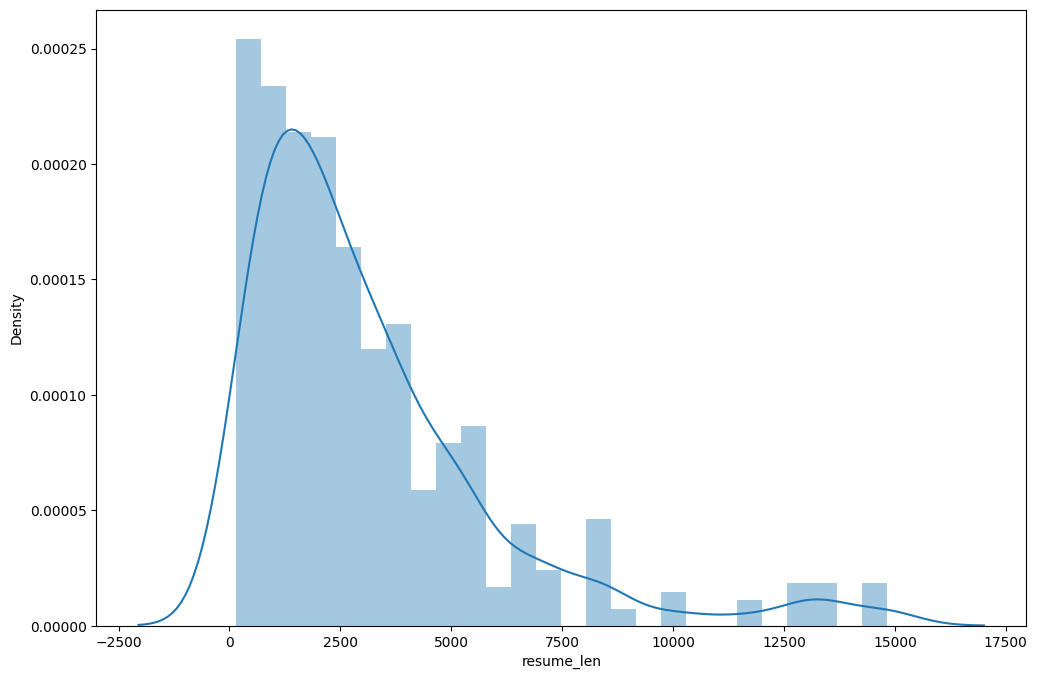

In [ ]:
df['resume_len'] = df.Resume.apply(len)
sns.distplot(df.resume_len);

In [ ]:
df.describe()

,resume_len
count,962.000000
mean,3160.364865
std,2886.528521
min,142.000000
25%,1217.250000
50%,2355.000000
75%,4073.750000
max,14816.000000


In [ ]:
max_resume_len = 200

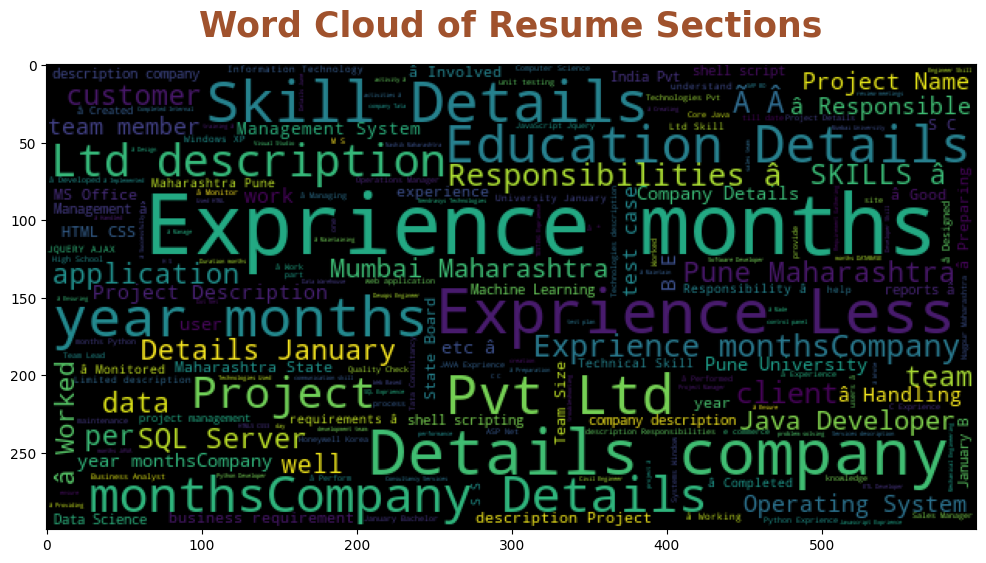

In [ ]:
wc = WordCloud(width=600,height=300,random_state=101).generate(' '.join(df.Resume))
plt.title(label='Word Cloud of Resume Sections',pad=20,fontsize=25,fontweight='bold',color='sienna')
plt.imshow(wc);

## Encoding the target labels i.e. all available jobs

In [ ]:
labels_dict = {}

for idx, label in enumerate(df.Category.unique()):
    labels_dict[label] = idx

labels_dict

{'Data Science': 0,
 'HR': 1,
 'Advocate': 2,
 'Arts': 3,
 'Web Designing': 4,
 'Mechanical Engineer': 5,
 'Sales': 6,
 'Health and fitness': 7,
 'Civil Engineer': 8,
 'Java Developer': 9,
 'Business Analyst': 10,
 'SAP Developer': 11,
 'Automation Testing': 12,
 'Electrical Engineering': 13,
 'Operations Manager': 14,
 'Python Developer': 15,
 'DevOps Engineer': 16,
 'Network Security Engineer': 17,
 'PMO': 18,
 'Database': 19,
 'Hadoop': 20,
 'ETL Developer': 21,
 'DotNet Developer': 22,
 'Blockchain': 23,
 'Testing': 24}

In [ ]:
df.Category = df.Category.apply(func=lambda x: labels_dict[x])
df.Category = df.Category.astype(np.int64)


## Text Preprocessing

In [ ]:
def text_preprocess(data,col):
    data[col] = data[col].apply(func=clean_html)
    data[col] = data[col].apply(func=remove_)
    data[col] = data[col].apply(func=removeStopWords)
    data[col] = data[col].apply(func=remove_digits)
    data[col] = data[col].apply(func=remove_links)
    data[col] = data[col].apply(func=remove_special_characters)
    data[col] = data[col].apply(func=punct)
    data[col] = data[col].apply(func=non_ascii)
    data[col] = data[col].apply(func=email_address)
    data[col] = data[col].apply(func=lower)
    return data

In [ ]:
preprocessed_df = text_preprocess(df,'Resume')
preprocessed_df

,Category,Resume,resume_len
0,0,skills programming languages python pandas num...,4786
1,0,education details may may b e uitrgpv data sci...,1268
2,0,areas interest deep learning control system de...,1871
3,0,skills r python sap hana tableau sap hana sql ...,6995
4,0,education details mca ymcaust faridabad haryan...,452
...,...,...,...
957,24,computer skills proficient ms office word basi...,2130
958,24,willingness accept challenges positive thinkin...,2306
959,24,personal skills quick learner eagerness learn ...,3319
960,24,computer skills software knowledge mspower poi...,767


## Downloading the pretrained tokenizer and DistilBert model

Note: you may need to restart the kernel to use updated packages.Collecting pytorch
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pytorch
Failed to build pytorch



  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\yassi\AppData\Local\Temp\pip-install-pjkaz9as\pytorch_b73cfe26ce754c4993f95b9d6869e5e9\setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("manishiitg/distilbert-resume-parts-classify")
bert_model = TFDistilBertForSequenceClassification.from_pretrained("manishiitg/distilbert-resume-parts-classify",from_pt=True)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


## Splitting the preprocessed dataset into training and test sets

In [ ]:
train_df, test_df = train_test_split(preprocessed_df,test_size=0.3,shuffle=True,random_state=101)

## Text Tokenization

In [ ]:
X_train = tokenizer(text=train_df.Resume.tolist(),
                   add_special_tokens=True,
                   padding=True,
                   truncation=True,
                   max_length=max_resume_len,
                   return_tensors='tf',
                   return_attention_mask=True,
                   return_token_type_ids=False,
                   verbose=1)

X_test = tokenizer(text=test_df.Resume.tolist(),
                  add_special_tokens=True,
                  padding=True,
                  truncation=True,
                  max_length=max_resume_len,
                  return_tensors='tf',
                  return_attention_mask=True,
                  return_token_type_ids=False,
                  verbose=1)

## Defining the model architecture

In [ ]:
input_ids = Input(shape=(max_resume_len,),dtype=tf.int32,name='input_ids')
attention_masks = Input(shape=(max_resume_len,),dtype=tf.int32,name='attention_mask')

In [ ]:
word_embeddings = bert_model(input_ids,attention_mask=attention_masks)[0]

output = Flatten()(word_embeddings)
output = Dense(units=1024,activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.25)(output)
output = Dense(units=512,activation='relu')(output)
output = Dropout(0.25)(output)
output = Dense(units=256,activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.25)(output)
output = Dense(units=128,activation='relu')(output)
output = Dropout(0.25)(output)
output = Dense(units=64,activation='relu')(output)
output = Dense(units=25,activation='softmax')(output)

model = Model(inputs=[input_ids,attention_masks],outputs=output)
model.layers

In [ ]:
model.layers[2].trainable = True

## Visualizing the model architecture

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 200)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 200)]        0           []                               
                                                                                                  
 tf_distil_bert_for_sequence_cl  TFSequenceClassifie  66962700   ['input_ids[0][0]',              
 assification_1 (TFDistilBertFo  rOutput(loss=None,               'attention_mask[0][0]']         
 rSequenceClassification)       logits=(None, 12),                                                
                                 hidden_states=None                                           

In [ ]:
plot_model(model,to_file='model.png',dpi=100,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compiling the model

In [ ]:

from tensorflow.keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 5e-5
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)

adam = Adam(
    learning_rate=lr_schedule,
    epsilon=2e-8,
    clipnorm=1.0
)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=adam,
    metrics=[SparseCategoricalAccuracy(name='balanced_accuracy')]
)

## Training the fine-tuned Distil-Bert model

In [ ]:
es = EarlyStopping(monitor='val_balanced_accuracy',patience=250,verbose=1,mode='max',restore_best_weights=True)
mc = ModelCheckpoint('resume_parser.h5',monitor='val_balanced_accuracy',mode='max',verbose=1,save_best_only=True)

r = model.fit(x={'input_ids': X_train['input_ids'], 'attention_mask': X_train['attention_mask']},
             y=train_df.Category,
             epochs=500,
             batch_size=32,
             callbacks=[es,mc],
             validation_data=({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']},test_df.Category))

Epoch 1/500
22/22 [==============================] - ETA: 0s - loss: 3.6458 - balanced_accuracy: 0.0282 
Epoch 1: val_balanced_accuracy improved from -inf to 0.02422, saving model to resume_parser.h5
22/22 [==============================] - 687s 29s/step - loss: 3.6458 - balanced_accuracy: 0.0282 - val_loss: 3.2131 - val_balanced_accuracy: 0.0242
Epoch 2/500
22/22 [==============================] - ETA: 0s - loss: 3.5015 - balanced_accuracy: 0.0475 
Epoch 2: val_balanced_accuracy improved from 0.02422 to 0.03806, saving model to resume_parser.h5
22/22 [==============================] - 629s 29s/step - loss: 3.5015 - balanced_accuracy: 0.0475 - val_loss: 3.2060 - val_balanced_accuracy: 0.0381
Epoch 3/500
22/22 [==============================] - ETA: 0s - loss: 3.3751 - balanced_accuracy: 0.0698 
Epoch 3: val_balanced_accuracy improved from 0.03806 to 0.07958, saving model to resume_parser.h5
22/22 [==============================] - 625s 29s/step - loss: 3.3751 - balanced_accuracy: 0.069

## Visualizing the model performance

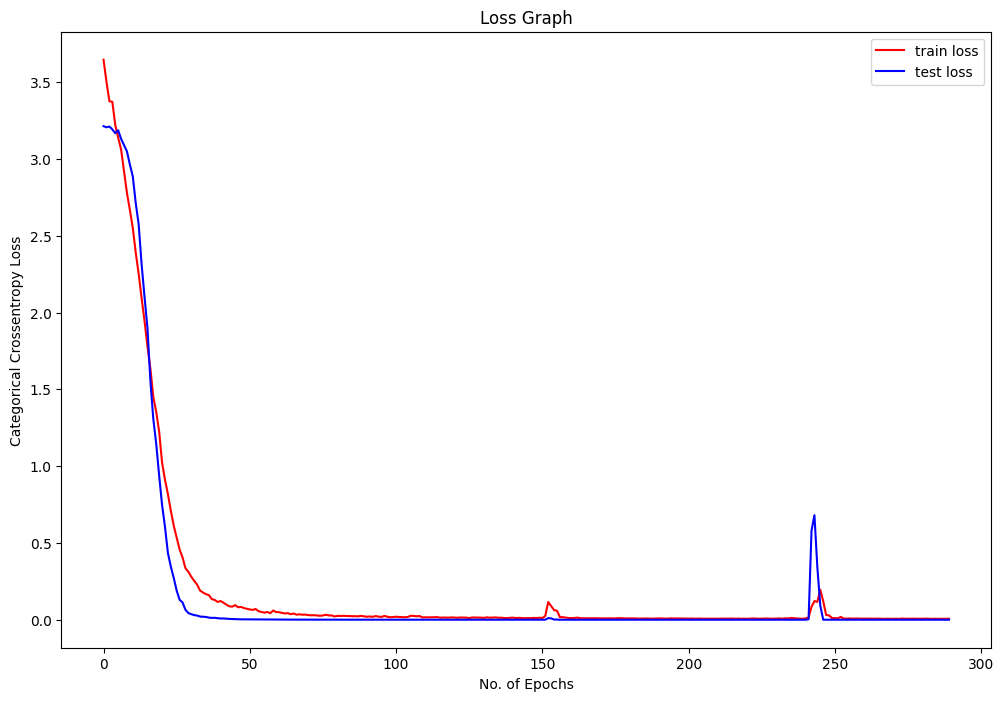

In [ ]:
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Categorical Crossentropy Loss')
plt.title('Loss Graph')
plt.legend();

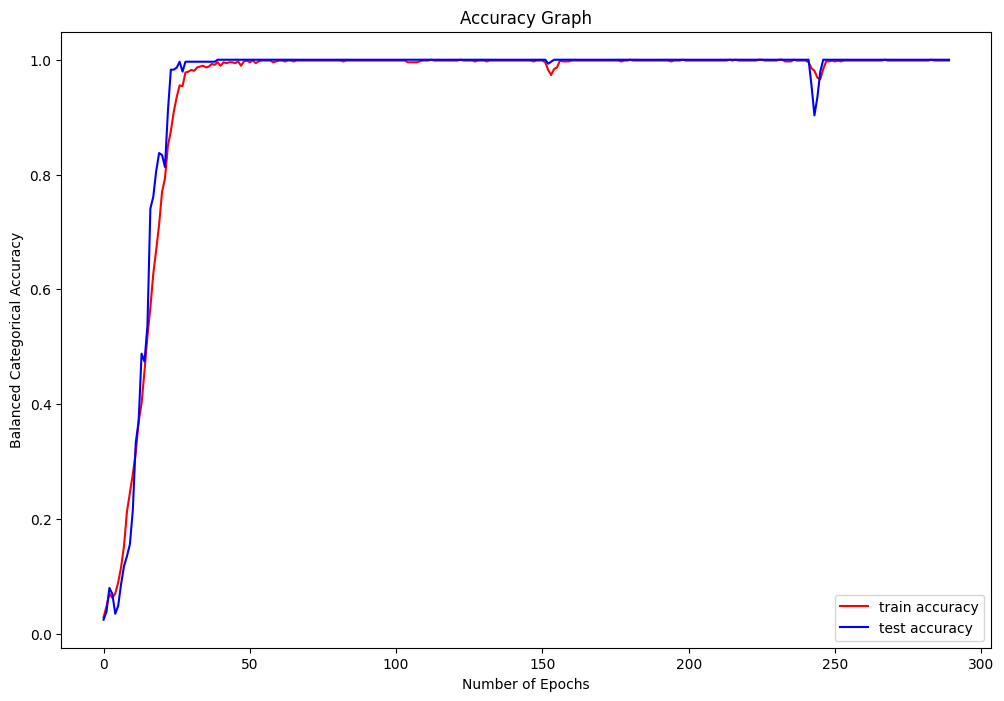

In [ ]:
plt.plot(r.history['balanced_accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_balanced_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Balanced Categorical Accuracy')
plt.title('Accuracy Graph')
plt.legend();

## Model Evaluation

In [ ]:
loss, acc = model.evaluate({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']},test_df.Category)
print("Test Sparse Categorical Crossentropy Loss:", loss)
print("Test Balanced Categorical Accuracy:", acc)

10/10 [==============================] - 72s 7s/step - loss: 0.0100 - balanced_accuracy: 1.0000
Test Sparse Categorical Crossentropy Loss: 0.009965774603188038
Test Balanced Categorical Accuracy: 1.0


In [ ]:
test_predictions = model.predict({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']})
test_predictions = np.argmax(test_predictions,axis=1)
test_predictions

10/10 [==============================] - 62s 6s/step


array([ 3, 14,  0,  0, 19, 10, 24, 21, 19, 15, 18, 13, 24, 24, 14,  7,  3,
       17, 23,  0, 13, 17,  9, 11, 14, 20,  4,  9, 17,  9, 20,  4,  4, 21,
        6, 12,  9, 23, 12, 24, 14, 24, 10,  9,  9, 18, 10, 21, 23,  3, 14,
       20, 14, 12,  1, 24,  6, 23, 16,  6, 12, 21, 14, 23, 24,  0, 16,  5,
        7, 22, 10,  0,  6,  2, 23,  3,  8,  3, 15, 18, 24, 19, 17,  3,  4,
       22,  2, 20, 14, 24,  9, 21,  0, 15,  3, 20, 20,  4, 10,  9,  9, 24,
       17, 11, 16,  1,  5,  3,  3,  9, 23, 17, 16,  0, 18, 22, 20,  4, 14,
       16, 14, 21,  2,  3,  5, 20,  1, 23,  5,  5,  8, 22,  6, 10, 15,  9,
        3,  9, 18,  0, 19, 10,  6,  5,  9,  7, 19,  5,  6,  4,  3,  4, 11,
        6,  9,  1,  5, 12, 20, 17, 13,  4, 13,  9, 16, 15,  9,  0, 24, 21,
       24, 21, 10, 18, 11, 11, 15,  5, 21, 24,  0,  4, 20, 18, 21, 24, 14,
        4,  6,  4,  0,  9, 21, 13,  4, 21,  4, 11, 14,  4,  5,  7, 17,  1,
        6,  7,  9, 23, 18, 14,  0, 23, 12, 23,  3, 21,  9, 21,  3, 20,  1,
       20, 14, 16, 20, 21

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(test_df.Category,test_predictions))
print("Classification Report:")
print(classification_report(test_df.Category,test_predictions))

Confusion Matrix:
[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0

This is absolutely incredible! The fine-tuned Distil-Bert model has produced an astonishing accuracy score of more than 99% on the test set.

In [ ]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 919.0 kB/s eta 0:00:14
     --------------------------------------- 0.1/12.8 MB 819.2 kB/s eta 0:00:16
     --------------------------------------- 0.1/12.8 MB 819.2 kB/s eta 0:00:16
      -------------------------------------- 0.2/12.8 MB 958.4 kB/s eta 0:00:14
      -------------------------------------- 0.2/12.8 MB 885.4 kB/s eta 0:00:15
      -------------------------------------- 0.3/12.8 MB 886.2 kB/s eta 0:00:15
      -------------------------------------- 0.3/12.8 MB 884.2 kB/s eta 0:00:15
     - ------------------------------------- 0.4/12.8 MB 825.0 kB/s eta 0:00:16
     - ------------------------------------- 0.4/12.8 MB 867.0 kB/s eta 0:00:15
     - ------------------------------------- 0.4/12.8 MB 860.2 kB/s eta 0:00:15
     - ------------------------------------- 0.5/12.8 MB

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()
skill_pattern_path = r"D:\projects\pfe\test\v2\jz_skill_patterns.jsonl"
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [ ]:
def get_skills(text):
    doc = nlp(text)
    #print(doc)
    myset = []
    subset = []
    for ent in doc.ents:
        #print("1")
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    #print(subset)
    return subset


def unique_skills(x):
    return list(set(x))

In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
clean = []
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

for review in df["Resume"]:
    # Remove special characters, URLs, and Twitter handles
    review = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"', " ", review)
    # Convert to lowercase and split into words
    review = review.lower().split()
    # Lemmatize words and remove stop words
    review = [lemmatizer.lemmatize(word) for word in review if word not in stop_words]
    # Join the words back into a single string
    review = " ".join(review)
    clean.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yassi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df2 = df
df2["Clean_Resume"] = clean
df2["skills"] = df["Clean_Resume"].str.lower().apply(get_skills)
df2["skills"] = df["skills"].apply(unique_skills)
df2

,Category,Resume,Clean_Resume,skills
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,"[sentiment analysis, logstash, visualization, ..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b e uit rgp...,"[outlier, feature selection, ml, time series, ..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,"[engineering, software, machine learning, pych..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,"[engineering, specification, nlp, machine lear..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,"[database, data structure, python, data scienc..."
...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skill proficient m office word basic ...,"[engineering, diagram, relay, testing, electri..."
958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenge positive thinking...,"[engineering, correctness, documentation, test..."
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skill quick learner eagerness learn n...,"[engineering, functional testing, documentatio..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skill software knowledge m power poin...,"[latex, design, software]"


In [ ]:
!pip install PyPDF2

In [ ]:

# importing required modules
from PyPDF2 import PdfReader

# creating a pdf reader object
reader = PdfReader("D:\\projects\\pfe\\test\\v2\\AmiraElsayed_CV.pdf")


# printing number of pages in pdf file
#print(len(reader.pages))
text = ''

for i in range(len(reader.pages)):
  # getting a specific page from the pdf file
  page = reader.pages[i]

  # extracting text from page
  text = text + page.extract_text()

print(len(text))
text

2689


'Exploring new\n \nmachine learning\n \ntechniques and\n \nalgorithms\n\uf004\nParticipating in\n \nmachine learning\n \ncompetitions\n\uf004\nContributing to open-\nsource machine\n \nlearning projects\n\uf004\nInterests\nProgramming Skills\nPython\nC++ & C\nHTML &  CSS\nPHP\nIDEs\nGoogle Colab\nJupyter\nVisual Studio\nEclipse\n MATLAB\nLanguages\nArabic\nEnglish\nSkills\nGiza, Egypt\n\uf015\n+201002892794\n\uf095\namirasyd1998@gmail.com\n\uf0e0\nContact\nAMIRA\nELSAYED\nMACHINE LEARNING ON CLOUD ENGINEER\nAn innovative and experienced Machine Learning on Cloud\n \nEngineer with expertise in designing and deploying large-scale,\n \ndistributed systems for data processing and analysis. Proficient\n \nin AWS cloud computing platforms. Skilled in developing and\n \ndeploying machine learning models using tools such as\n \nTensorFlow, PyTorch, and Scikit-Learn.\nProfile\nEngineering Office for Integrated Projects\n \n(EOIP)\nSoftware Engineer\nFront & back end developer\nFor 5 months\nExp

In [ ]:
## we need to clean and generate centances from my cv

# for clean:
import re
#print(text)
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
# Remove special characters, URLs, and Twitter handles
#re.sub(r"(?![\d_])\w","X","dfäg")
review = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"', " ", (text))
# Convert to lowercase and split into words
review = review.lower().split()
# Lemmatize words and remove stop words
review = [lemmatizer.lemmatize(word) for word in review if word not in stop_words]
# Join the words back into a single string
review = " ".join(review)
print("////////////////////")
print(len(review))
print(len(text))
print(review)

////////////////////
2273
2689
exploring new machine learning technique algorithm participating machine learning competition contributing open source machine learning project interest programming skill python c c html cs php ides google colab jupyter visual studio eclipse matlab language arabic english skill giza egypt 201002892794 amirasyd1998 com contact amira elsayed machine learning cloud engineer innovative experienced machine learning cloud engineer expertise designing deploying large scale distributed system data processing analysis proficient aws cloud computing platform skilled developing deploying machine learning model using tool tensorflow pytorch scikit learn profile engineering office integrated project eoip software engineer front back end developer 5 month experience hit solution machine learning engineer name entity recognition project nlp model recognize skill resume build classification model classify job title resume 1 month training electronics communication depart

In [ ]:
cv = list(review.split(" "))
len(cv)
cv_sentences = [cv[x:x+10] for x in range(0, len(cv), 10)]
print(len(cv_sentences))
cv_sentences

39


[['mathlouhi',
  'yassine',
  'tunisia',
  'ariana',
  '2080',
  'email',
  'mathlouthi',
  'mouhamed',
  'assine',
  'com'],
 ['linkedin',
  'yassine',
  'mathlouthi',
  'linkedin',
  'github',
  'yassine',
  'mathlouthi',
  'github',
  'com',
  'profile'],
 ['dynamic',
  'software',
  'engineering',
  'graduate',
  'bring',
  'unique',
  'combination',
  'technical',
  'expertise',
  'innovative'],
 ['thinking',
  'solid',
  'background',
  'front',
  'end',
  'back',
  'end',
  'development',
  'excel',
  'developing'],
 ['effective',
  'solution',
  'real',
  'world',
  'problem',
  'extensive',
  'experience',
  'artificial',
  'intelligence',
  'ai'],
 ['natural',
  'language',
  'processing',
  'nlp',
  'using',
  'technology',
  'create',
  'intelligent',
  'system',
  'proficient'],
 ['html',
  'cs',
  'javascript',
  'php',
  'node',
  'j',
  'framework',
  'laravel',
  'angularjs',
  'thorough'],
 ['understanding',
  'modern',
  'development',
  'practice',
  'collaborative'

In [ ]:
from transformers import BertTokenizer
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)


In [ ]:
input_ids = []
new_tokens, new_labels = [], []
for i in range(len(cv_sentences)):
  test_sentence = cv_sentences[i]
  tokenized_sentence = tokenizer.encode(test_sentence)
  input_ids.append(torch.tensor([tokenized_sentence]).cuda())
label_indices = []
for i in range(len(input_ids)):
  with torch.no_grad():
    output = model(input_ids[i])
  label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)
  tokens = tokenizer.convert_ids_to_tokens(input_ids[i].to('cpu').numpy()[0])
  for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(tag_values[label_idx])
        new_tokens.append(token)



AssertionError: Torch not compiled with CUDA enabled

In [ ]:
SKILLS = []
for token, label in zip(new_tokens, new_labels):
  if label in ['B-SKILL', 'I-SKILL', 'O-SKILL']:
    SKILLS.append(token)
    print("{}\t{}".format(label, token))

print(SKILLS)
df_SKILLS = pd.DataFrame()
df_SKILLS['SKILLS'] = SKILLS
df_SKILLS.to_csv('CV_SKILLS.csv')

[]


In [ ]:


# Assuming you have new resume data in a variable called 'new_resume_data'

# Preprocess the new resume data (assuming you have preprocessed it similarly to the training data)
# tokenizer = Your tokenizer object
# max_resume_len = Your maximum resume length
new_preprocessed_data = review

# Tokenize the preprocessed data
X_new = tokenizer(text=new_preprocessed_data,
                  add_special_tokens=True,
                  padding=True,
                  truncation=True,  # Truncate the input if it exceeds max_length
                  max_length=200,   # Set max_length to match the model's capacity
                  return_tensors='tf',
                  return_attention_mask=True,
                  return_token_type_ids=False,
                  verbose=1)

# Make predictions
predictions = loaded_model.predict({'input_ids': X_new['input_ids'], 'attention_mask': X_new['attention_mask']})

# Convert predictions to category labels
predicted_categories = tf.argmax(predictions, axis=1)

# Print predicted categories
print(predicted_categories)


1/1 [==============================] - 0s 293ms/step
tf.Tensor([14], shape=(1,), dtype=int64)
